## Students Information

Please enter the names and IDs of the two students below:

1. **Name**: Ahmed Hosny Abdelrazik
   **ID**: `9202077` 

2. **Name**: Abdelaziz salah
   **ID**: `9202810` 


## Students Instructions

This is your first graded lab assignment, as you put the work you have studied in the lectures in action, please take this opportunity to enhance your understanding of the concepts and hone your skills. As you work on your assignment, please keep the following instructions in mind:

- Clearly state your personal information where indicated.
- Be ready with your work before the time of the next discussion slot in the schedule.
- Plagiarism will be met with penalties, refrain from copying any answers to make the most out of the assignment. If any signs of plagiarism are detected, actions will be taken.
- It is acceptable to share the workload of the assignment bearing the discussion in mind.
- Feel free to [reach out](mailto:cmpsy27@gmail.com) if there were any ambiguities or post on the classroom.

## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!





## Installation Instructions

In this lab assignment, we require additional Python libraries for scientific mathematics, particularly in the context of machine learning (ML) and satellite image analysis. To fulfill these requirements, we need to install Scikit-learn and Scikit-image. 
1. Install Scikit-learn  
Scikit-learn (Sklearn) is a powerful Python library for ML tasks, offering various algorithms for classification, regression, clustering, and model evaluation. It is extensively used for analyzing satellite imagery, enabling tasks such as land cover classification and environmental parameter prediction. On the other hand, Scikit-image (Skimage) provides comprehensive tools for image processing and computer vision, facilitating tasks such as image preprocessing, feature extraction, and segmentation. These libraries are essential for extracting valuable insights from satellite images and conducting advanced analysis in scientific computing and research domains.
```bash
pip install scikit-learn scikit-image
```


> **Note:** You are allowed to install any other necessary libraries you deem useful for solving the lab. Please ensure that any additional libraries are compatible with the project requirements and are properly documented in your submission.


## Maximum Likelihood Estimator (MLE) Classifier
The Maximum Likelihood Estimator (MLE) is a fundamental statistical approach used to infer the parameters of a given distribution that are most likely to result in the observed data. In the context of image classification, MLE helps to quantify the probability of observing the data within each predefined class based on their distinct statistical properties. This method is highly effective for classifying images into categories by comparing the likelihoods of the data under different model parameters, enabling the most probable class assignment.

1. **Calculate Class Priors**: Estimate the probability of each class based on the training dataset. This is expressed as:
   $$
   P(C_k) = \frac{N_k}{N}
   $$
   where \(N_k\) is the number of samples of class \(k\) and \(N\) is the total number of samples.

2. **Estimate Class-specific Parameters**: For each class, estimate parameters such as the mean \(\mu_k\) and covariance \(\Sigma_k\) of features that describe the distribution of the data:
   $$
   \mu_k = \frac{1}{N_k} \sum_{x \in C_k} x
   $$
   $$
   \Sigma_k = \frac{1}{N_k} \sum_{x \in C_k} (x - \mu_k)(x - \mu_k)^T
   $$

3. **Compute Likelihoods**: For a given test instance \(x\), compute the likelihood of that instance belonging to each class using the estimated parameters:
   $$
   p(x | C_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)\right)
   $$

4. **Classify Based on Maximum Likelihood**: Assign the class label to each test instance based on the highest likelihood, which can be calculated as:
   $$
   \hat{y} = \arg\max_{k} P(C_k) \cdot p(x | C_k)
   $$

The Naive Bayes classifier is perhaps the most well-known application of the Maximum Likelihood Estimator principle in classification tasks. It assumes that the features in each class are independent, simplifying the computation of likelihoods. While Naive Bayes is popular for its simplicity and efficiency, it is not the only technique that leverages the MLE approach. Other classical alternatives include Logistic Regression, which applies MLE to estimate the parameters that best predict categorical outcomes, and Gaussian Mixture Models, which use MLE to estimate the parameters of multiple Gaussian distributions within the data. Students are encouraged to explore these models to gain a deeper understanding of statistical estimation techniques.


## Req- Image Classification for EuroSATallBands
Image classification is a key challenge in satellite imaging and remote sensing. As discussed in the lecture, this task is typically conducted on a pixel-wise basis because a single image can contain multiple textural elements of different celestial features. However, for this specific assignment, we will focus on identifying the dominant phenomena in the image as the basis for classification.

- **Load the Images**: Load the images of the EuroSAT dataset that belong to the **residential**, **river**, and **forest** classes.

- **Split the Dataset**: Split the dataset such that 10% of each class is used as testing data, and the remainder is used for training your classifier. Use the indices provided by `np.random.choice` with seed set to `27`. **Code is provided do not change it**.

- **Feature Extraction**: Extract suitable features from the images that you think might be relevant in distinguishing each class from the others. Keep in mind the curse of dimensionality when selecting features.

- **Implement a Maximum Likelihood Estimator (MLE)**: Implement a Maximum Likelihood Estimator (MLE) based on your training data. 
- **Report Accuracy and Average F1 Score**: After testing your classifier on the test set, report the **Accuracy** and **Average F1 Score** of your model.


In [4]:
# Add your libraries here
import numpy as np

In [5]:
# DO NOT CHANGE THIS CELL
## Training set indices.
np.random.seed(27)  # Set random seed for reproducibility

# Randomly select indices for the test sets for each class
residential_test_indices = np.random.choice(np.arange(3000), size=300, replace=False)
forest_test_indices = np.random.choice(np.arange(3000), size=300, replace=False)
river_test_indices = np.random.choice(np.arange(2500), size=250, replace=False)


In [6]:
import os
import tifffile
import cv2

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        # Construct the full file path using forward slashes and raw string literals
        filepath = os.path.join(folder, filename).replace('\\', '/')
        try:
            img = tifffile.imread(filepath)
            if img is not None:
                images.append(img)
            else:
                print(f"Could not read image: {filepath}")
        except Exception as e:
            print(f"Error reading image {filepath}: {e}")
    return images

def load_RGB_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        # Construct the full file path using forward slashes and raw string literals
        filepath = os.path.join(folder, filename).replace('\\', '/')
        try:
            img = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
            if img is not None:
                images.append(img)
            else:
                print(f"Could not read image: {filepath}")
        except Exception as e:
            print(f"Error reading image {filepath}: {e}")
    return images
# Define the paths to the dataset folders
residential_folder = 'traintest/Residential'
river_folder = 'traintest/River'
forest_folder = 'traintest/Forest'

# Load images from each folder
residential_images = load_images_from_folder(residential_folder)
river_images = load_images_from_folder(river_folder)
forest_images = load_images_from_folder(forest_folder)


# Define the paths to the dataset folders
residential_RGB_folder = 'traintest_RGB/Residential'
river_RGB_folder = 'traintest_RGB/River'
forest_RGB_folder = 'traintest_RGB/Forest'

# Load images from each folder
residential_RGB_images = load_RGB_images_from_folder(residential_RGB_folder)
river_RGB_images = load_RGB_images_from_folder(river_RGB_folder)
forest_RGB_images = load_RGB_images_from_folder(forest_RGB_folder)


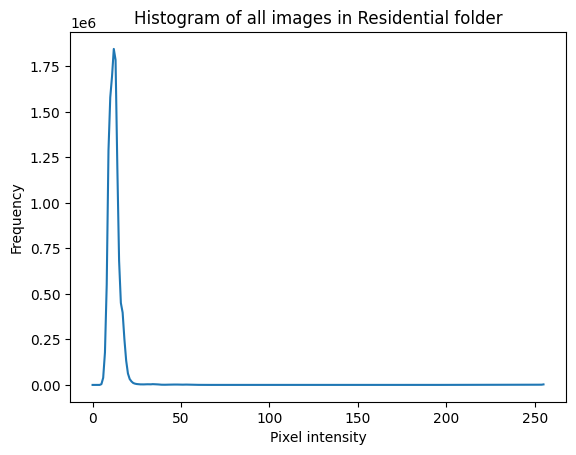

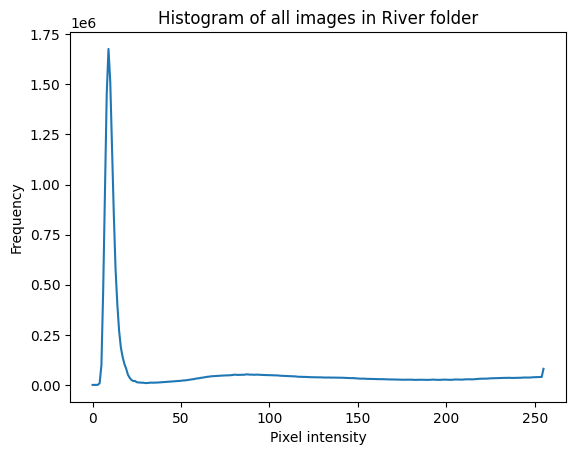

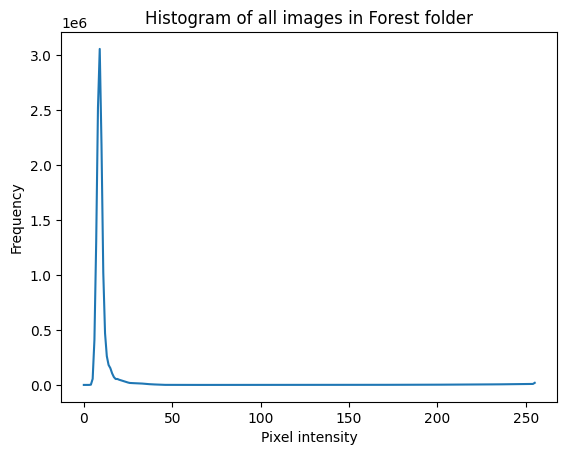

Residential: 12
River: 9
Forest: 9
Residential: 12338577.0
River: 17847124.0
Forest: 12634114.0


In [7]:
#calculate histogram of all images in residential_images as one histogram
residential_histogram = np.zeros(256)
for image in residential_images:
    hist = np.histogram(image, bins=256, range=(0, 256))[0]
    residential_histogram += hist

# display the histogram
import matplotlib.pyplot as plt
plt.plot(residential_histogram)
plt.title('Histogram of all images in Residential folder')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.show()

#calculate histogram of all images in river_images as one histogram
river_histogram = np.zeros(256)
for image in river_images:
    hist = np.histogram(image, bins=256, range=(0, 256))[0]
    river_histogram += hist

# display the histogram
plt.plot(river_histogram)
plt.title('Histogram of all images in River folder')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.show()

#calculate histogram of all images in forest_images as one histogram
forest_histogram = np.zeros(256)
for image in forest_images:
    hist = np.histogram(image, bins=256, range=(0, 256))[0]
    forest_histogram += hist

# display the histogram
plt.plot(forest_histogram)
plt.title('Histogram of all images in Forest folder')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.show()

# print the pixel intensity with the highest frequency in each histogram
print(f"Residential: {np.argmax(residential_histogram)}")
print(f"River: {np.argmax(river_histogram)}")
print(f"Forest: {np.argmax(forest_histogram)}")
# print the sum of all pixel intensities in each histogram
print(f"Residential: {np.sum(residential_histogram)}")
print(f"River: {np.sum(river_histogram)}")
print(f"Forest: {np.sum(forest_histogram)}")





In [8]:
print(f"Loaded {len(residential_images)} residential images")
print(f"Loaded {len(river_images)} river images")
print(f"Loaded {len(forest_images)} forest images")
print("the first image shape is: ", residential_images[0].shape)

print(f"Loaded {len(residential_RGB_images)} residential RGB images")
print(f"Loaded {len(river_RGB_images)} river RGB images")
print(f"Loaded {len(forest_RGB_images)} forest RGB images")


Loaded 3000 residential images
Loaded 2500 river images
Loaded 3000 forest images
the first image shape is:  (64, 64, 13)
Loaded 3000 residential RGB images
Loaded 2500 river RGB images
Loaded 3000 forest RGB images


In [9]:
from sklearn.utils import shuffle

train_images=[]
train_labels=[]
test_images=[]
test_labels=[]

train_images_RGB=[]
train_labels_RGB=[]
test_images_RGB=[]
test_labels_RGB=[]
for i in range(3000):
    if i in residential_test_indices:
        test_images.append(residential_images[i])
        test_labels.append("residential")
        test_images_RGB.append(residential_RGB_images[i])
        test_labels_RGB.append("residential")
    else:
        train_images.append(residential_images[i])
        train_labels.append("residential")
        train_images_RGB.append(residential_RGB_images[i])
        train_labels_RGB.append("residential")
for i in range(3000):
    if i in forest_test_indices:
        test_images.append(forest_images[i])
        test_labels.append("forest")
        test_images_RGB.append(forest_RGB_images[i])
        test_labels_RGB.append("forest")
    else:
        train_images.append(forest_images[i])
        train_labels.append("forest")
        train_images_RGB.append(forest_RGB_images[i])
        train_labels_RGB.append("forest")
for i in range(2500):
    if i in river_test_indices:
        test_images.append(river_images[i])
        test_labels.append("river")
        test_images_RGB.append(river_RGB_images[i])
        test_labels_RGB.append("river")
    else:
        train_images.append(river_images[i])
        train_labels.append("river")
        train_images_RGB.append(river_RGB_images[i])
        train_labels_RGB.append("river")

# Shuffle the training and testing data
train_images, train_labels = shuffle(train_images, train_labels, random_state=27)
test_images, test_labels = shuffle(test_images, test_labels, random_state=27)

train_images_RGB, train_labels_RGB = shuffle(train_images_RGB, train_labels_RGB, random_state=27)
test_images_RGB, test_labels_RGB = shuffle(test_images_RGB, test_labels_RGB, random_state=27)



In [10]:
print(f"Training set contains {len(train_images)} images")
print(f"Testing set contains {len(test_images)} images")
print(f"Training set contains {len(train_images_RGB)} RGB images")
print(f"Testing set contains {len(test_images_RGB)} RGB images")


Training set contains 7650 images
Testing set contains 850 images
Training set contains 7650 RGB images
Testing set contains 850 RGB images


In [11]:
from sklearn.decomposition import PCA

def extract_multi_band_features(images,pca_components):
    features = []
    for image in images:

        red=image[:,:,3].flatten()
        nir=image[:,:,4].flatten()
        green=image[:,:,2].flatten()
        blue=image[:,:,1].flatten()
        swir=image[:,:,5].flatten()

        nvdi = (nir-red)/(nir+red) # Normalized Difference Vegetation Index
        ndwi = (green-nir)/(green+nir) # Normalized Difference Water Index
        ndbi = (swir-nir)/(swir+nir)  # Normalized Difference Built-up Index 
        ndwg = (swir-green)/(swir+green)  # Normalized Difference Built-up Index     

        result = np.concatenate((red, nir, green, blue, swir, nvdi, ndwi, ndbi,ndwg), axis=0)
        features.append(result)
    # Create a PCA object
    pca = PCA(n_components=pca_components)
    # Fit the PCA object
    pca.fit(features)
    # Transform the features
    features = pca.transform(features)
    return features



In [12]:
block_size = 2
cell_size = 4
winSize = (image.shape[1] // cell_size * cell_size, image.shape[0] // cell_size * cell_size)
blockSize = (block_size*cell_size,block_size*cell_size)
blockStride = (cell_size,cell_size)
cellSize = (cell_size,cell_size)
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
signedGradient = True 

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                      histogramNormType,L2HysThreshold,gammaCorrection,nlevels, signedGradient)

def extract_feature_hog_multiband(images,pca_components):
    features = []
    for image in images:
        # Calculate the HOG features for each band
        total_hog_features = []
        for band in range(image.shape[2]):
            band_image = image[:,:,band]
            band_image = (band_image - band_image.min()) / (band_image.max() - band_image.min()) * 255
            band_image = band_image.astype('uint8')
            hog_features = hog.compute(band_image)
            total_hog_features.append(hog_features)
        total_hog_features = np.concatenate(total_hog_features).flatten()
        
        features.append(total_hog_features)

    # Create a PCA object
    pca = PCA(n_components=pca_components)
    # Fit the PCA object
    pca.fit(features)
    # Transform the features
    features = pca.transform(features)
    
    return features

In [13]:
block_size = 2
cell_size = 4
winSize = (image.shape[1] // cell_size * cell_size, image.shape[0] // cell_size * cell_size)
blockSize = (block_size*cell_size,block_size*cell_size)
blockStride = (cell_size,cell_size)
cellSize = (cell_size,cell_size)
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
signedGradient = True 

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                      histogramNormType,L2HysThreshold,gammaCorrection,nlevels, signedGradient)

def extract_features_RGB(images,pca_components):
  
    features = []
    for image in images:
        # apply HoG to the image
        hog_features = hog.compute(image)
        # Flatten the features
        hog_features = hog_features.flatten()
        features.append(hog_features)
    # Create a PCA object
    pca = PCA(n_components=pca_components)
    # Fit the PCA object
    pca.fit(features)
    # Transform the features
    features = pca.transform(features)
    return features

In [14]:
from sklearn.metrics import accuracy_score,f1_score
# Maximum likelihood estimation
class MLE:
    def __init__(self):
        self.class_means = None
        self.class_covs = None
        self.class_priors = None
        self.class_labels = None
        self.num_classes = None
        self.num_features = None
        
        
    def fit(self, x_train, y_train):
        self.class_labels = np.unique(y_train)
        self.num_classes = len(self.class_labels)
        self.num_features = x_train.shape[1]
        self.class_means = np.zeros((self.num_classes, self.num_features))
        self.class_covs = np.zeros((self.num_classes, self.num_features, self.num_features))
        self.class_priors = np.zeros(self.num_classes)
        
        for i, class_label in enumerate(self.class_labels):
            class_data = x_train[y_train == class_label]
            self.class_means[i] = np.mean(class_data, axis=0)
            self.class_covs[i] = np.cov(class_data.T)
            self.class_priors[i] = np.mean(y_train == class_label)
            
            
    def predict(self, x_test):
        num_samples = x_test.shape[0]
        posteriors = np.zeros((num_samples, self.num_classes))
        # print all calss means and covariances
        for class_label, class_mean, class_cov in zip(self.class_labels, self.class_means, self.class_covs):
            print(f"Class {class_label} mean: {class_mean}")
            print(f"Class {class_label} covariance: {class_cov}")
            print()

        for i, _ in enumerate(self.class_labels):
            class_mean = self.class_means[i]
            class_cov = self.class_covs[i]
            class_prior = self.class_priors[i]
            
            # Compute the Mahalanobis distance for each sample
            mahalanobis = np.sum(np.matmul(x_test - class_mean, np.linalg.inv(class_cov)) * (x_test - class_mean), axis=1)
            
            # Compute the likelihoods using the Mahalanobis distance
            class_likelihood = np.exp(-0.5 * mahalanobis) / np.sqrt(np.linalg.det(class_cov))
            
            # Multiply by class priors
            posteriors[:, i] = class_likelihood * class_prior
        
        return self.class_labels[np.argmax(posteriors, axis=1)]


In [15]:
# train and predict 
for i in range(1,13):
  # Extract multi-band features from training and testing images
  train_features = extract_multi_band_features(train_images,pca_components=i)
  test_features = extract_multi_band_features(test_images,pca_components=i)
  mle = MLE()
  train_labels = np.array(train_labels).reshape(-1,1)
  train_labels = train_labels.flatten()
  test_labels = np.array(test_labels).reshape(-1,1)
  test_labels = test_labels.flatten()
  mle.fit(train_features,train_labels)
  predictions = mle.predict(test_features)
  accuracy = accuracy_score(test_labels, predictions)
  print(f"PCA Components: {i}", end=' ')
  print(f"Accuracy: {accuracy * 100:.2f}%", end=' ')
  f1 = f1_score(test_labels, predictions, average='macro')
  print(f"F1 Score: {f1:.2f}")

Class forest mean: [-27016.36140608]
Class forest covariance: [[2.91022972e+08]]

Class residential mean: [32824.93287994]
Class residential covariance: [[1.52724293e+09]]

Class river mean: [-6970.28576863]
Class river covariance: [[6.40878439e+08]]

PCA Components: 1 Accuracy: 64.82% F1 Score: 0.62
Class forest mean: [-27016.36140608  20693.12397626]
Class forest covariance: [[2.91022972e+08 3.19582642e+08]
 [3.19582642e+08 6.52783514e+08]]

Class residential mean: [32824.93287994 -8683.01633298]
Class residential covariance: [[1.52724293e+09 2.07507871e+08]
 [2.07507871e+08 2.65536163e+08]]

Class river mean: [ -6970.28576863 -14412.12917193]
Class river covariance: [[6.40878439e+08 2.80280369e+08]
 [2.80280369e+08 8.04446025e+08]]

PCA Components: 2 Accuracy: 77.65% F1 Score: 0.77
Class forest mean: [-27016.36140608  20693.12397626    133.0533388 ]
Class forest covariance: [[ 2.91022972e+08  3.19582642e+08 -9.71657575e+06]
 [ 3.19582642e+08  6.52783514e+08 -1.73112596e+07]
 [-9.716

In [16]:
# train and predict on RGB images
for i in range(1,13):
  # Extract multi-band features from training and testing images
  train_features = extract_features_RGB(train_images_RGB,pca_components=i)
  test_features = extract_features_RGB(test_images_RGB,pca_components=i)
  print("features shape",train_features.shape)
  mle = MLE()
  train_labels_RGB = np.array(train_labels_RGB).reshape(-1,1)
  train_labels_RGB = train_labels_RGB.flatten()
  test_labels_RGB = np.array(test_labels_RGB).reshape(-1,1)
  test_labels_RGB = test_labels_RGB.flatten()
  mle.fit(train_features,train_labels_RGB)
  predictions = mle.predict(test_features)
  accuracy = accuracy_score(test_labels_RGB, predictions)
  print(f"PCA Components: {i}", end=' ')
  print(f"Accuracy: {accuracy * 100:.2f}%", end=' ')
  f1 = f1_score(test_labels_RGB, predictions, average='macro')
  print(f"F1 Score: {f1:.2f}")


features shape (7650, 1)
Class forest mean: [-0.83495727]
Class forest covariance: [[0.65891679]]

Class residential mean: [0.07449788]
Class residential covariance: [[0.63682312]]

Class river mean: [0.91255127]
Class river covariance: [[6.26144202]]

PCA Components: 1 Accuracy: 65.06% F1 Score: 0.65
features shape (7650, 2)
Class forest mean: [-0.83495725 -0.38397959]
Class forest covariance: [[ 0.65891678 -0.05640268]
 [-0.05640268  0.39117369]]

Class residential mean: [ 0.07449785 -0.17544667]
Class residential covariance: [[0.63682311 0.00110032]
 [0.00110032 0.37641246]]

Class river mean: [0.91255128 0.6713115 ]
Class river covariance: [[ 6.26144206 -0.91571827]
 [-0.91571827  3.35355375]]

PCA Components: 2 Accuracy: 75.53% F1 Score: 0.76
features shape (7650, 3)
Class forest mean: [-0.83495727 -0.3839829  -0.37184959]
Class forest covariance: [[ 0.65891678 -0.05640216 -0.06755777]
 [-0.05640216  0.39117259 -0.08522315]
 [-0.06755777 -0.08522315  0.20275874]]

Class residentia

In [17]:
def mean_feature(images,):
    features = []
    for image in images:
        # feature =  np.std(image, axis=(0, 1)) * np.mean(image, axis=(0, 1))
        feature=np.concatenate((np.mean(image, axis=(0, 1)),np.std(image, axis=(0, 1))) )
        features.append(feature)
    # Convert the list of features to a numpy array
    features = np.array(features)
    return features
### MULTI-BAND FEATURES ###
from sklearn.metrics import confusion_matrix

train_features = mean_feature(train_images)
test_features = mean_feature(test_images)
print("features shape",train_features.shape)
mle = MLE()
train_labels = np.array(train_labels).reshape(-1,1)
train_labels = train_labels.flatten()
test_labels = np.array(test_labels).reshape(-1,1)
test_labels = test_labels.flatten()
mle.fit(train_features,train_labels)
predictions = mle.predict(test_features)

accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%", end=' ')
f1 = f1_score(test_labels, predictions, average='macro')
print(f"F1 Score: {f1:.2f}")
# confusion matrix
cm = confusion_matrix(test_labels, predictions)
print(cm)

features shape (7650, 26)
Class forest mean: [1.10991999e+03 8.11504632e+02 6.87736631e+02 4.15793155e+02
 7.48967067e+02 2.10011004e+03 2.68802511e+03 2.63413982e+03
 8.26215610e+02 9.93443043e+00 1.31254340e+03 5.35467720e+02
 3.00478896e+03 8.15283450e+00 2.35024133e+01 4.61863007e+01
 4.54890185e+01 6.99859423e+01 2.34850729e+02 3.24433754e+02
 4.19787673e+02 7.15998498e+01 9.51530481e-01 1.80276546e+02
 8.60287072e+01 3.69613762e+02]
Class forest covariance: [[ 1.19031016e+04  8.85240928e+03  3.67711342e+03  4.58674184e+03
  -4.16762632e+02 -1.70221104e+04 -2.26897095e+04 -2.31854980e+04
  -1.44799458e+04 -2.68404670e+00 -5.62222388e+03 -1.12365164e+03
  -2.31918072e+04 -4.54060655e+01 -1.22497541e+02 -4.17808345e+02
  -9.45311117e+01 -3.66992015e+02 -2.35560019e+03 -2.96037402e+03
  -2.89226129e+03 -1.48506908e+03  5.20910084e+00  2.35166754e+02
   2.97516523e+02 -2.62156041e+03]
 [ 8.85240928e+03  6.98357644e+03  4.02131416e+03  4.31660999e+03
   2.13091286e+03 -8.86655950e+03 -

In [21]:
### RGB FEATURES ###
def mean_feature_RGB(images):
    features = []
    for image in images:
        feature =  np.concatenate((np.mean(image, axis=(0, 1)),np.std(image, axis=(0, 1))) )
        features.append(feature)
    # Convert the list of features to a numpy array
    features = np.array(features)

    return features

# Extract multi-band features from training and testing images
train_features = mean_feature_RGB(train_images_RGB)
test_features = mean_feature_RGB(test_images_RGB)
mle = MLE()
train_labels_RGB = np.array(train_labels_RGB).reshape(-1,1)
train_labels_RGB = train_labels_RGB.flatten()
test_labels_RGB = np.array(test_labels_RGB).reshape(-1,1)
test_labels_RGB = test_labels_RGB.flatten()
mle.fit(train_features,train_labels_RGB)
predictions = mle.predict(test_features)
accuracy = accuracy_score(test_labels_RGB, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%", end=' ')
f1 = f1_score(test_labels_RGB, predictions, average='macro')
print(f"F1 Score: {f1:.2f}")
# confusion matrix
cm = confusion_matrix(test_labels_RGB, predictions)
print(cm)

Class forest mean: [75.93215676 64.48844862 39.3939077   2.80916521  4.16141995  4.23419074]
Class forest covariance: [[59.49300293 34.46260506 36.78733437 -0.55036173 -1.64586361  0.64756445]
 [34.46260506 66.15626432 43.29004642  2.03034133  4.08950604  5.52044957]
 [36.78733437 43.29004642 39.19952504  1.65067723  2.30674855  5.14679564]
 [-0.55036173  2.03034133  1.65067723  0.94069408  1.33984776  1.88158295]
 [-1.64586361  4.08950604  2.30674855  1.33984776  2.43897547  2.61847785]
 [ 0.64756445  5.52044957  5.14679564  1.88158295  2.61847785  4.23079346]]

Class residential mean: [113.10928241 103.82213659 100.06438712  18.15922108  19.35129161
  25.13346643]
Class residential covariance: [[323.03778327 359.12801715 501.24149409  53.19859608  60.37635846
   55.14981096]
 [359.12801715 461.86045793 660.95697824  81.9969783   91.62716017
   94.30181984]
 [501.24149409 660.95697824 984.97093868 126.0383714  141.60179648
  149.94954159]
 [ 53.19859608  81.9969783  126.0383714   35.1

### Grading Rubric (Total: 10 Marks)

The lab is graded based on the following criteria:

1. **Data Loading and Preparation (2 Marks)**
   - Correctly loads images for the residential, river, and forest classes. (0.5 Marks)
   - Accurately splits the dataset into training and testing subsets and clearly shows this split. (1.5 Marks)

2. **Feature Extraction (2 Marks)**
   - Implements feature extraction appropriately, considering the curse of dimensionality. (1 Mark)
   - Extracts and justifies the selection of features relevant to distinguishing the classes. (1 Mark)

3. **Implementation of MLE Classifier (3 Marks)**
   - Correctly calculates and clearly shows class priors and class-specific parameters. (1 Mark)
   - Accurately computes likelihoods using the likelihood equation (probability density function) and classifies based on maximum likelihood. Must clearly show these calculations and explain the choice of likelihood equation. (2 Marks)

4. **Model Evaluation and Understanding (3 Marks)**
   - Shows **confusion matrix** and correctly calculates and clearly shows the calculations for Accuracy and Average F1 Score. (1 Mark)
   - **Comparison amongst your peers.** Compares the model's performance against those of peers to identify strengths and areas for improvement. (2 Marks)

Each section of the lab will be evaluated on completeness, and correctness in approach and analysis. Part of the rubric also includes the student's ability to explain and justify their choices and results.


## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!
